## Imports

In [36]:
import pandas as pd
import numpy as np
#import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#path='C:/Repo/MiM_Analytics_Tesis/Tesis/'
path='C:/Users/E0662122/Repo/MiM_Analytics_Tesis/Tesis/'

## PostgreSQL Connection

In [14]:
postgreSQL = {"host": "localhost", "port": "5432", "username": "postgres", 
               "password": "trivisono", "database": "SportsAnalytics"}

uri = 'postgresql+psycopg2://'+postgreSQL['username']+':'+postgreSQL['password']+'@'+postgreSQL['host']+':'+ postgreSQL['port']+'/'+postgreSQL['database']

engine = create_engine(uri)
conn = engine.raw_connection()
cursor = conn.cursor()

In [15]:
df = pd.read_sql_query("SELECT * FROM fdm.tesis_abt;", conn)

In [16]:
df.shape

(7244, 118)

In [18]:
df.to_csv(path+'tesis_data.csv', encoding='latin-1', decimal='.', sep='|', index=False)

## Functions

In [216]:
def plot_winrate_barplot(df, var_x, label_x):
    df_plot = df[[var_x, 'target', 'fixture_id']].groupby([var_x, 'target']).count().unstack().fillna(0)
    df_plot['Total'] = df_plot[('fixture_id', 'Home')]+df_plot[('fixture_id', 'Away')]+df_plot[('fixture_id','Draw')]
    df_plot = df_plot.div(df_plot.iloc[:,-1], axis=0) * 100
    df_plot.columns = ['Away', 'Draw', 'Home', 'Total']

    fig = px.bar(df_plot.reset_index(), x=var_x, y=['Away', 'Draw', 'Home'], title=f"Win Rate (%) by {label_x}", 
                labels={var_x: label_x, "value": "Win Rate (%)", "variable": "Match Result"})

    fig.show()

## EDA

In [2]:
df = pd.read_csv(path+'tesis_data.csv', encoding='latin-1', decimal='.', sep='|')

In [7]:
df.describe()

,league_id,league_season,league_round_number,league_progress,total_rounds,total_teams,fixture_id,venue_id,teams_home_id,teams_away_id,rank_last,rank_points_last,rank_points_leader,rank_points_top5,home_rank,home_rank_points,home_rank_goals_diff,away_rank,away_rank_points,away_rank_goals_diff,home_points_won_l5,away_form,away_points_won_l5,away_ha_points_won_l5,home_gk_rating_l5,home_df_rating_l5,home_mf_rating_l5,home_fw_rating_l5,home_team_rating_l5,away_gk_rating_l5,away_df_rating_l5,away_mf_rating_l5,away_fw_rating_l5,away_team_rating_l5,home_matches_cnt,away_matches_cnt,home_shots_on_goal_l5,home_shots_off_goal_l5,home_total_shots_l5,home_blocked_shots_l5,home_shots_insidebox_l5,home_shots_outsidebox_l5,home_fouls_l5,home_corner_kicks_l5,home_offsides_l5,home_ball_possesion_l5,home_yellow_cards_l5,home_red_cards_l5,home_gk_saves_l5,home_total_passes_l5,home_passes_acc_l5,home_passes_pct_l5,home_fouls_opp_l5,home_yellow_cards_opp_l5,home_red_cards_opp_l5,home_total_shots_opp_l5,home_shots_on_goal_opp_l5,home_shots_off_goal_opp_l5,home_shots_outsidebox_opp_l5,home_blocked_shots_opp_l5,home_corner_kicks_opp_l5,away_shots_on_goal_l5,away_shots_off_goal_l5,away_total_shots_l5,away_blocked_shots_l5,away_shots_insidebox_l5,away_shots_outsidebox_l5,away_fouls_l5,away_corner_kicks_l5,away_offsides_l5,away_ball_possesion_l5,away_yellow_cards_l5,away_red_cards_l5,away_gk_saves_l5,away_total_passes_l5,away_passes_acc_l5,away_passes_pct_l5,away_fouls_opp_l5,away_yellow_cards_opp_l5,away_red_cards_opp_l5,away_total_shots_opp_l5,away_shots_on_goal_opp_l5,away_shots_off_goal_opp_l5,away_shots_outsidebox_opp_l5,away_blocked_shots_opp_l5,away_corner_kicks_opp_l5,home_max_scorer,away_max_scorer,home_max_assister,away_max_assister,home_max_saver,away_max_saver,home_motivation_cup,home_motivation_leader,home_motivation_stay,away_motivation_cup,away_motivation_leader,away_motivation_stay
count,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,6594.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,6266.000000,6597.000000,6596.000000,6365.000000,6612.000000,6202.000000,6594.000000,6599.000000,6346.000000,6617.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.000000,7072.00000,7072.000000,7072.000000,7072.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000
mean,188.700856,2018.098288,15.877554,0.501580,31.610436,20.773330,152187.877278,435.573578,1226.955411,1226.936637,12.774296,12.268774,36.975014,28.136791,6.903782,23.811568,0.431806,6.858918,23.914826,0.566538,0.429341,0.325041,0.446606,0.325041,6.761253,6.661656,6.696349,6.729622,6.693762,6.770112,6.657471,6.676535,6.735381,6.685461,4.845305,4.842902,3.666572,5.089791,11.820136,2.296097,6.062783,5.223840,14.041714,4.368213,1.374717,0.486895,1.951499,0.003111,2.558541,373.895786,294.367223,0.746267,14.043552,2.075085,0.003252,12.088942,3.765554,5.205175,6.233032,2.344457,4.488264,3.752828,5.212387,12.089508,2.347285,6.246465,5.287613,14.048360,4.487415,1.387302,0.490278,1.914310,0.002262,2.469033,377.048925,297.666572,0.747952,14.033654,2.102517,0.003111,11.773473,3.642251,5.06957,6.039027,2.295249,4.362557,5.156681,5.248896,3.477637,3.509249,10.293898,10.341110,0.093733,0.037410,0.207620,0.094285,0.0

In [20]:
# Feature Set
cols_base = ['country_name', 'country_code', 'league_id', 'league_name', 'league_type', 'league_season', 'league_round',
             'league_round_number', 'league_progress', 'total_rounds', 'total_teams', 'fixture_id', 'referee', 'venue_id',
             'teams_home_id', 'teams_home_name', 'teams_away_id', 'teams_away_name', 'target']

cols_date = ['date_tz', 'date_match', 'date_dow', 'time_match', 'date_day']

cols_rank = ['rank_last', 'rank_points_last', 'rank_points_leader', 'rank_points_top5', 'home_rank', 'home_rank_points',
              'home_rank_goals_diff', 'away_rank', 'away_rank_points', 'away_rank_goals_diff']

cols_prematch = ['home_formation', 'away_formation', 'home_form', 'home_points_won_l5', 'home_ha_form', 
                 'home_ha_points_won_l5', 'away_form', 'away_points_won_l5', 'away_ha_form', 'away_ha_points_won_l5',
                 'home_gk_rating_l5', 'home_df_rating_l5', 'home_mf_rating_l5', 'home_fw_rating_l5', 
                 'home_team_rating_l5', 'away_gk_rating_l5', 'away_df_rating_l5', 'away_mf_rating_l5',
                 'away_fw_rating_l5', 'away_team_rating_l5']

cols_stats = ['home_shots_on_goal_l5', 'home_shots_off_goal_l5', 'home_total_shots_l5', 'home_blocked_shots_l5', 
              'home_shots_insidebox_l5', 'home_shots_outsidebox_l5', 'home_fouls_l5', 'home_corner_kicks_l5',
              'home_offsides_l5', 'home_ball_possesion_l5', 'home_yellow_cards_l5', 'home_red_cards_l5', 
              'home_gk_saves_l5', 'home_total_passes_l5', 'home_passes_acc_l5', 'home_passes_pct_l5', 'home_fouls_opp_l5',
              'home_yellow_cards_opp_l5', 'home_red_cards_opp_l5', 'home_total_shots_opp_l5', 'home_shots_on_goal_opp_l5', 
              'home_shots_off_goal_opp_l5', 'home_shots_outsidebox_opp_l5', 'home_blocked_shots_opp_l5', 
              'home_corner_kicks_opp_l5', 'away_shots_on_goal_l5', 'away_shots_off_goal_l5', 'away_total_shots_l5',
              'away_blocked_shots_l5', 'away_shots_insidebox_l5', 'away_shots_outsidebox_l5', 'away_fouls_l5',
              'away_corner_kicks_l5', 'away_offsides_l5', 'away_ball_possesion_l5', 'away_yellow_cards_l5', 
              'away_red_cards_l5', 'away_gk_saves_l5', 'away_total_passes_l5', 'away_passes_acc_l5', 'away_passes_pct_l5',
              'away_fouls_opp_l5', 'away_yellow_cards_opp_l5', 'away_red_cards_opp_l5', 'away_total_shots_opp_l5', 
              'away_shots_on_goal_opp_l5', 'away_shots_off_goal_opp_l5', 'away_shots_outsidebox_opp_l5', 
              'away_blocked_shots_opp_l5', 'away_corner_kicks_opp_l5']

cols_key_players = ['home_max_scorer', 'away_max_scorer', 'home_max_assister', 'away_max_assister', 'home_max_saver',
                    'away_max_saver']

cols_motivation = ['home_motivation_cup', 'home_motivation_leader', 'home_motivation_stay', 'away_motivation_cup', 
                   'away_motivation_leader', 'away_motivation_stay']

### Target

In [16]:
df_summary = df[['country_name', 'target', 'fixture_id']].groupby(['country_name', 'target']).count().unstack()
df_summary['Total'] = df_summary[('fixture_id', 'Home')]+df_summary[('fixture_id', 'Away')]+df_summary[('fixture_id','Draw')]
df_summary.div(df_summary.iloc[:,-1], axis=0) * 100

fixture_id                        Total
target             Away       Draw       Home       
country_name                                        
Argentina     29.430582  27.831094  42.738324  100.0
Brazil        24.802632  27.565789  47.631579  100.0
Chile         25.412961  32.782719  41.804320  100.0
Colombia      23.193473  29.020979  47.785548  100.0
Mexico        26.706231  29.080119  44.213650  100.0
Peru          21.935484  29.677419  48.387097  100.0

In [52]:
df_plot = df[['country_name', 'league_season', 'target', 'fixture_id']].groupby(['country_name','league_season', 'target']).count().unstack().transpose()
for season in df_plot.columns:
    df_plot[season] = round(df_plot[season]/df_plot[season].sum()*100,2)

In [70]:
df_lineplot = df_plot.transpose().reset_index()
df_lineplot.columns = ['country_name', 'season', 'Away', 'Draw', 'Home']
df_lineplot['season'] = df_lineplot['season'].astype(str)

In [253]:
plot_winrate_barplot(df, var_x="league_season", label_x="Season")

In [251]:
plot_winrate_barplot(df, var_x="country_name", label_x="Country")

In [147]:
df['league_progress_cat'] = np.select([df['league_progress']<=0.10, df['league_progress']<=0.20, 
                                       df['league_progress']<=0.30, df['league_progress']<=0.40,
                                       df['league_progress']<=0.50, df['league_progress']<=0.60,
                                       df['league_progress']<=0.70, df['league_progress']<=0.80, 
                                       df['league_progress']<=0.90, df['league_progress']<=1], 
                                      ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', 
                                       '60-70', '70-80', '80-90', '90-100'])

In [250]:
plot_winrate_barplot(df, var_x="league_progress_cat", label_x="League Progress")

### Date

In [167]:
df_date = df[cols_base+cols_date].copy()

In [170]:
df_date.head()

,country_name,country_code,league_id,league_name,league_type,league_season,league_round,league_round_number,league_progress,total_rounds,total_teams,fixture_id,referee,venue_id,teams_home_id,teams_home_name,teams_away_id,teams_away_name,target,date_tz,date_match,date_dow,time_match,date_day
0,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35468,"Braulio Da Silva Machado, Brazil",-1,130,Gremio,120,Botafogo,Home,2017-05-14T22:00:00+00:00,2017-05-14,Sunday,17:00,Afternoon
1,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35473,"Marcos Mateus Pereira, Brazil",-1,139,Ponte Preta,123,Sport Recife,Home,2017-05-14T19:00:00+00:00,2017-05-14,Sunday,14:00,Afternoon
2,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35471,"Marcelo De Lima Henrique, Brazil",-1,135,Cruzeiro,126,Sao Paulo,Home,2017-05-14T19:00:00+00:00,2017-05-14,Sunday,14:00,Afternoon
3,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35474,"Reway Wagner, Brazil",-1,124,Fluminense,128,Santos,Home,2017-05-14T14:00:00+00:00,2017-05-14,Sunday,09:00,Morning
4,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35475,"Elmo Alves Resende Cunha, Brazil",-1,131,Corinthians,132,Chapecoense-sc,Draw,2017-05-13T22:00:00+00:00,2017-05-13,Saturday,17:00,Afternoon


In [175]:
plot_winrate_barplot(df_date, var_x="date_dow", label_x="Day of Week")

In [174]:
plot_winrate_barplot(df_date, var_x="date_day", label_x="Daytime")

In [114]:
df_plot = df_date[['country_name', 'date_dow', 'date_day', 'target', 'fixture_id']].groupby(
    ['country_name', 'date_dow', 'date_day','target']).count().unstack()

df_plot['Total'] = df_plot[('fixture_id', 'Home')]+df_plot[('fixture_id', 'Away')]+df_plot[('fixture_id','Draw')]
df_plot = df_plot.div(df_plot.iloc[:,-1], axis=0) * 100
df_plot.columns = ['Away', 'Draw', 'Home', 'Total']

fig = px.bar(df_plot.reset_index(), x="country_name", y=['Away', 'Draw', 'Home'], title="Long-Form Input",
             facet_row="date_day", facet_col="date_dow",
             category_orders={"date_dow": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                              "date_day": ["Morning", "Afternoon", "Evening"]})
fig.show()

### Ranking

In [142]:
df_rank = df[cols_base+cols_rank].copy()

In [254]:
df_rank.head()

,country_name,country_code,league_id,league_name,league_type,league_season,league_round,league_round_number,league_progress,total_rounds,total_teams,fixture_id,referee,venue_id,teams_home_id,teams_home_name,teams_away_id,teams_away_name,target,rank_last,rank_points_last,rank_points_leader,rank_points_top5,home_rank,home_rank_points,home_rank_goals_diff,away_rank,away_rank_points,away_rank_goals_diff,rank_diff,rank_points_diff,rank_diff_cat,rank_points_diff_cat
0,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35468,"Braulio Da Silva Machado, Brazil",-1,130,Gremio,120,Botafogo,Home,0,0,0,NaN,0,0,0,0,0,0,0.0,0.0,5. 0,5. 0
1,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35473,"Marcos Mateus Pereira, Brazil",-1,139,Ponte Preta,123,Sport Recife,Home,0,0,0,NaN,0,0,0,0,0,0,0.0,0.0,5. 0,5. 0
2,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35471,"Marcelo De Lima Henrique, Brazil",-1,135,Cruzeiro,126,Sao Paulo,Home,0,0,0,NaN,0,0,0,0,0,0,0.0,0.0,5. 0,5. 0
3,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35474,"Reway Wagner, Brazil",-1,124,Fluminense,128,Santos,Home,0,0,0,NaN,0,0,0,0,0,0,0.0,0.0,5. 0,5. 0
4,Brazil,BR,71,Serie A,League,2017,Regular Season - 1,1,0.026316,38,20,35475,"Elmo Alves Resende Cunha, Brazil",-1,131,Corinthians,132,Chapecoense-sc,Draw,0,0,0,NaN,0,0,0,0,0,0,0.0,0.0,5. 0,5. 0


In [238]:
df_rank['rank_diff'] = ((df_rank['home_rank']-df_rank['away_rank'])/df_rank['rank_last']).fillna(0)
df_rank['rank_points_diff'] = ((df_rank['home_rank_points']-df_rank['away_rank_points'])/df_rank['rank_points_leader']).fillna(0)

In [239]:
df_rank[['rank_diff', 'rank_points_diff']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,rank_diff,rank_points_diff
count,7244.000000,7244.000000
mean,0.006847,-0.010872
std,0.383569,0.298977
min,-1.000000,-1.000000
10%,-0.500000,-0.383039
20%,-0.333333,-0.244444
30%,-0.200000,-0.142857
40%,-0.083333,-0.066667
50%,0.000000,0.000000
60%,0.111111,0.053571


In [241]:
df_rank['rank_diff_cat'] = np.select([df_rank['rank_diff']<-0.5, df_rank['rank_diff']<=-0.3, 
                                     df_rank['rank_diff']<=-0.15, df_rank['rank_diff']<0, df_rank['rank_diff']==0,
                                     df_rank['rank_diff']<=0.15, df_rank['rank_diff']<=0.3,
                                     df_rank['rank_diff']<=0.5, df_rank['rank_diff']>0.5], 
                                     ['1. <m50', '2. m50-m30', '3. m30-m15', '4. m15-0', '5. 0', '6. 0-15', 
                                      '7. 15-30', '8. 30-50', '9. >50'])

df_rank['rank_points_diff_cat'] = np.select([df_rank['rank_points_diff']<-0.5, df_rank['rank_points_diff']<=-0.3, 
                                             df_rank['rank_points_diff']<=-0.15, df_rank['rank_points_diff']<0,
                                             df_rank['rank_points_diff']==0,
                                             df_rank['rank_points_diff']<=0.15, df_rank['rank_points_diff']<=0.3,
                                             df_rank['rank_points_diff']<=0.5, df_rank['rank_points_diff']>0.5], 
                                             ['1. <m50', '2. m50-m30', '3. m30-m15', '4. m15-0', '5. 0', '6. 0-15', 
                                              '7. 15-30', '8. 30-50', '9. >50'])

In [243]:
plot_winrate_barplot(df_rank, var_x="rank_diff_cat", label_x="Difference in Ranking")

C:\Users\E0662122\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rank_diff', ylabel='Density'>

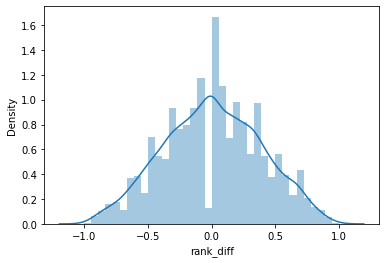

In [244]:
sns.distplot(df_rank["rank_diff"])

In [245]:
df_rank["rank_diff_cat"].value_counts(normalize=True)

8. 30-50      0.139840
2. m50-m30    0.137079
7. 15-30      0.125759
3. m30-m15    0.117891
4. m15-0      0.105881
6. 0-15       0.098150
9. >50        0.097460
1. <m50       0.090420
5. 0          0.087521
Name: rank_diff_cat, dtype: float64

In [246]:
plot_winrate_barplot(df_rank, var_x="rank_points_diff_cat", label_x="Difference in Ranking (Points)")

C:\Users\E0662122\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rank_points_diff', ylabel='Density'>

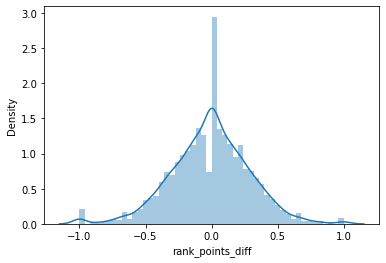

In [248]:
sns.distplot(df_rank["rank_points_diff"])

In [247]:
df_rank["rank_points_diff_cat"].value_counts(normalize=True)

6. 0-15       0.174489
4. m15-0      0.168967
7. 15-30      0.141082
3. m30-m15    0.136803
2. m50-m30    0.113611
8. 30-50      0.102154
5. 0          0.083379
1. <m50       0.045003
9. >50        0.034511
Name: rank_points_diff_cat, dtype: float64